In [1]:
import numpy as np
from EarthProfile import *
import matplotlib.pyplot as plt

In [2]:

irho_c, irho_m, mean_rho_core, mean_rho_mantle = get_irho()
K_core,K_mantle,q,ER,n2rho_core,n2rho_mantle,ne2rho_core,ne2rho_mantle = get_K()

<rho_core>   = 1.11e-02 (kg/cm^3)
<rho_mantle> = 4.48e-03 (kg/cm^3)
ne / rho_core   = 2.77e+26 (1/kg)
ne / rho_mantle = 2.97e+26 (1/kg)


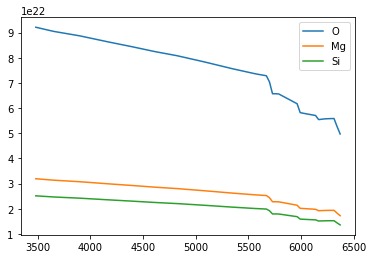

In [3]:
lm = np.linspace(rCore,rEarth,100)
plt.plot(lm,irho_m(lm)*mass_dict['O'][3]/(mass_dict['O'][0]*GeV2kg) ,label='O')
plt.plot(lm,irho_m(lm)*mass_dict['Mg'][3]/(mass_dict['Mg'][0]*GeV2kg),label='Mg' )
plt.plot(lm,irho_m(lm)*mass_dict['Si'][3]/(mass_dict['Si'][0]*GeV2kg),label='Si' )
plt.legend()

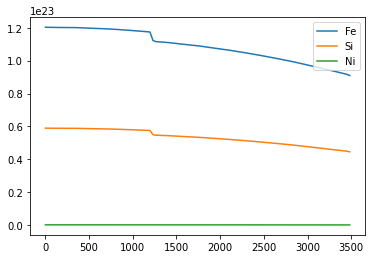

In [4]:
lc = np.linspace(0,rCore,100)
plt.plot(lc,irho_c(lc)*mass_dict['Fe'][2]/(mass_dict['Fe'][0]*GeV2kg) ,label='Fe')
plt.plot(lc,irho_c(lc)*mass_dict['Si'][3]/(mass_dict['Si'][0]*GeV2kg),label='Si' )
plt.plot(lc,irho_c(lc)*mass_dict['Ni'][3]/(mass_dict['Ni'][0]*GeV2kg),label='Ni' )
plt.legend()

# Test Sampling

In [5]:
from realES import *
import matplotlib.pyplot as plt
import scipy.interpolate
import io


#5e7,1e-28,0.02,10
input_vals = ('5e7,1e-28,0.01,10').split(',')

mdm = float(input_vals[0])
sige = float(input_vals[1])
rawN = 2**25
N = int(input_vals[3])
v0 = float(input_vals[2])
r_init = 6371.

def init_sample(N,r):
    stheta = np.random.rand(N)*2*np.pi
    sr2 = np.random.rand(N)*r**2
    sr = np.sqrt(sr2)
    sx = sr*np.cos(stheta)
    sy = sr*np.sin(stheta)
    sz = -np.sqrt(r**2 - sx**2 - sy**2)
    return sx,sy,sz

sx,sy,sz = init_sample(N,r_init-1e-3)




s = EarthEvents(mdm,sige)
s.load_Ktot()
s.calc_sum_ndsig2rho_v2dlnEdlnq(n=0)
s.inSIG2rhos()


ne / rho_core   = 2.77e+26 (1/kg)
ne / rho_mantle = 2.97e+26 (1/kg)
<rho_core>   = 1.11e-02 (kg/cm^3)
<rho_mantle> = 4.48e-03 (kg/cm^3)
<ne> * sige (core)                   = 3.06e-04 (1/cm)|
<ne> * sige (mantle)                 = 1.33e-04 (1/cm)|
v_min from min(ER)                   : 6.34e-04
v_min hard cut                       : 1.00e-03
Calculating \int\sig_{ion} ...
(v=1e-1) \sum <ni*sigi> (core)       = 2.96e-04 (1/cm)|
(v=1e-1) \sum <ni*sigi> (mantle)     = 1.30e-04 (1/cm)|


In [11]:
s.direct_sample(0.001,N=10000000)

(14960, 5466)

5466


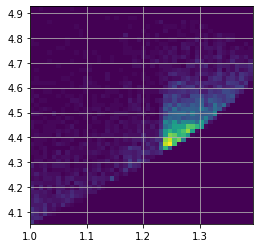

In [12]:
plt.figure(figsize=(4,4))
print(len(s.ER_sample_mantle))
plt.hist2d(np.log10(s.ER_sample_mantle),np.log10(s.q_sample_mantle),bins=50);
plt.grid()

# Velocity

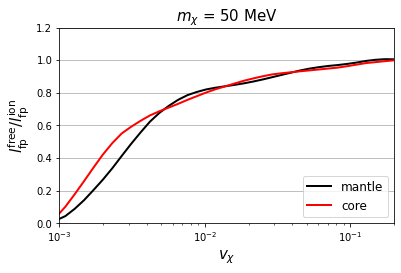

In [8]:
plt.figure(figsize=(6,4))
v = np.logspace(-20,np.log10(0.2),300)
plt.gcf().subplots_adjust(bottom=0.2)
plt.plot(v,s.insig2rho_mantle(v)/ne2rho_mantle/1e-28,label='mantle',color='k',lw=2)
plt.plot(v,s.insig2rho_core(v)/ne2rho_core/1e-28,label='core',color='r',lw=2)
plt.xlabel('$v_\chi$',size=15)
plt.title('$m_\chi$ = %.0f MeV'%(s.mdm/1e6),size=15)
plt.ylabel(r'$l_{\rm fp}^{\rm free}/l_{\rm fp}^{\rm ion}$',size=15)
plt.legend(fontsize=12,loc=4)
plt.grid(axis='y')
plt.ylim(0,1.2)
plt.xlim(1e-3,0.2)
plt.xscale('log')
plt.savefig('Sigma.pdf')

# check h5py

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

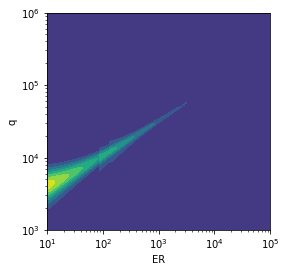

In [16]:
f = h5py.File('EarthAtomicResponse/Al_Ktot.hdf5','r')
ER = np.array(f['ER'])
q = np.array(f['q'])
Ktot = np.array(f['Ktot'])
ER_,q_ = np.meshgrid( ER,q,indexing='ij' )
plt.figure(figsize=(4,4))
plt.contourf(ER_,q_,Ktot)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('ER')
plt.ylabel('q')
f.close()

In [17]:
s.direct_sample(0.1)

(10, 11)

In [18]:
mdm = 5e7
v = 0.001

insqrt = mdm**2*v**2 - 2*mdm*ER
insqrt = np.where(insqrt<0.,0.,insqrt)
qmin = mdm*v - np.sqrt(insqrt)
qmax = mdm*v + np.sqrt(insqrt)
#msk = (q[None,:]>qmin[:,None])*(q[None,:]<qmax[:,None])
msk = ER_<(q_*v-q_**2/2/mdm)

<ipython-input-19-141c5691ac01>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ER_,q_,K)


(3000.0, 200000.0)

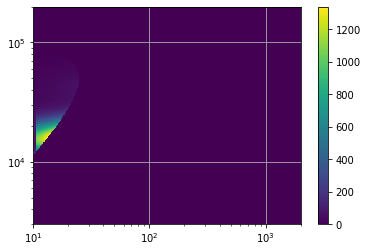

In [19]:
K = Ktot*ER[:,None]*q[None,:]*msk
plt.pcolormesh(ER_,q_,K)
plt.yscale('log')
plt.xscale('log')
#plt.xticks([mdm*v**2/2])
plt.grid()
plt.colorbar()
plt.xlim(1e1,2e3)
plt.ylim(3e3,2e5)